In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df_movies = pd.read_csv(r'C:\Users\anavi\OneDrive\Escritorio\Individual1 _ Henry\movies.csv')

C:\Users\anavi\AppData\Local\Temp\ipykernel_27584\3995942989.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv(r'C:\Users\anavi\OneDrive\Escritorio\Individual1 _ Henry\movies.csv')


Se inicia visualizando los datos con los que se cuenta, luego se observan los datos nulos y se hace una descripción de las variables numericas. 

In [4]:
df_movies.head() #Para mirar que información tengo despues de la limpieza que hice. 

,budget,id,original_title,popularity,release_date,revenue,title,vote_average,vote_count,Collection,genres,ProdCompany_1,ProdCompany_2,ProdCompany_3,Character Name,Lead actor,Director,release_year,return
0,30000000.0,862,Toy Story,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",Pixar Animation Studios,NaN,NaN,Woody (voice),Tom Hanks,John Lasseter,1995,12.451801
1,65000000.0,8844,Jumanji,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,NaN,"['Adventure', 'Fantasy', 'Family']",TriStar Pictures,Teitler Film,Interscope Communications,Alan Parrish,Robin Williams,Joe Johnston,1995,4.043035
2,0.0,15602,Grumpier Old Men,11.7129,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"['Romance', 'Comedy']",Warner Bros.,Lancaster Gate,NaN,Max Goldman,Walter Matthau,Howard Deutch,1995,0.000000
3,16000000.0,31357,Waiting to Exhale,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,NaN,"['Comedy', 'Drama', 'Romance']",Twentieth Century Fox Film Corporation,NaN,NaN,Savannah 'Vannah' Jackson,Whitney Houston,Forest Whitaker,1995,5.090760
4,0.0,11862,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,['Comedy'],Sandollar Productions,Touchstone Pictures,NaN,George Banks,Steve Martin,Charles Shyer,1995,0.000000


In [5]:
df_movies.info() #Para  mirar si tengo muchos datos nulos y el tipo de datos que tengo 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45366 entries, 0 to 45365
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          45366 non-null  float64
 1   id              45366 non-null  object 
 2   original_title  45366 non-null  object 
 3   popularity      45364 non-null  object 
 4   release_date    45366 non-null  object 
 5   revenue         45366 non-null  float64
 6   title           45363 non-null  object 
 7   vote_average    45363 non-null  float64
 8   vote_count      45363 non-null  float64
 9   Collection      4488 non-null   object 
 10  genres          42982 non-null  object 
 11  ProdCompany_1   33570 non-null  object 
 12  ProdCompany_2   16996 non-null  object 
 13  ProdCompany_3   9037 non-null   object 
 14  Character Name  41314 non-null  object 
 15  Lead actor      43014 non-null  object 
 16  Director        44527 non-null  object 
 17  release_year    45366 non-null 

La primera observación que hago es que mis variables numericas no tienen datos nulos, la mayoria de valores nulos están en variables cualitativas, como las compañias productoras o si la pelicula pertenece a una collección. 

In [6]:
#Este codigo me permite entender el comportamiento general de mis variables: cuantas variables hay, el promedio, la desviación, minimos, maximos, 
# percentiles...
df_movies.describe() 

,budget,revenue,vote_average,vote_count,release_year,return
count,4.536600e+04,4.536600e+04,45363.000000,45363.000000,45366.000000,4.536600e+04
mean,4.233516e+06,1.123256e+07,5.624064,110.117453,1991.873562,6.601883e+02
std,1.744167e+07,6.439684e+07,1.915402,491.810701,24.067938,7.470153e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,2.787965e+09,10.000000,14075.000000,2020.000000,1.239638e+07


De las variables numericas (las anteriores) la descripcion arrojada no es muy explicativa, unicamente veo que en release year no me arroja ningun resultado que me sirva, no  lo tendré en cuenta. 

Muestro histogramas de estas variables para representarlas mejor y poder visualizar tendencias y la distribución.

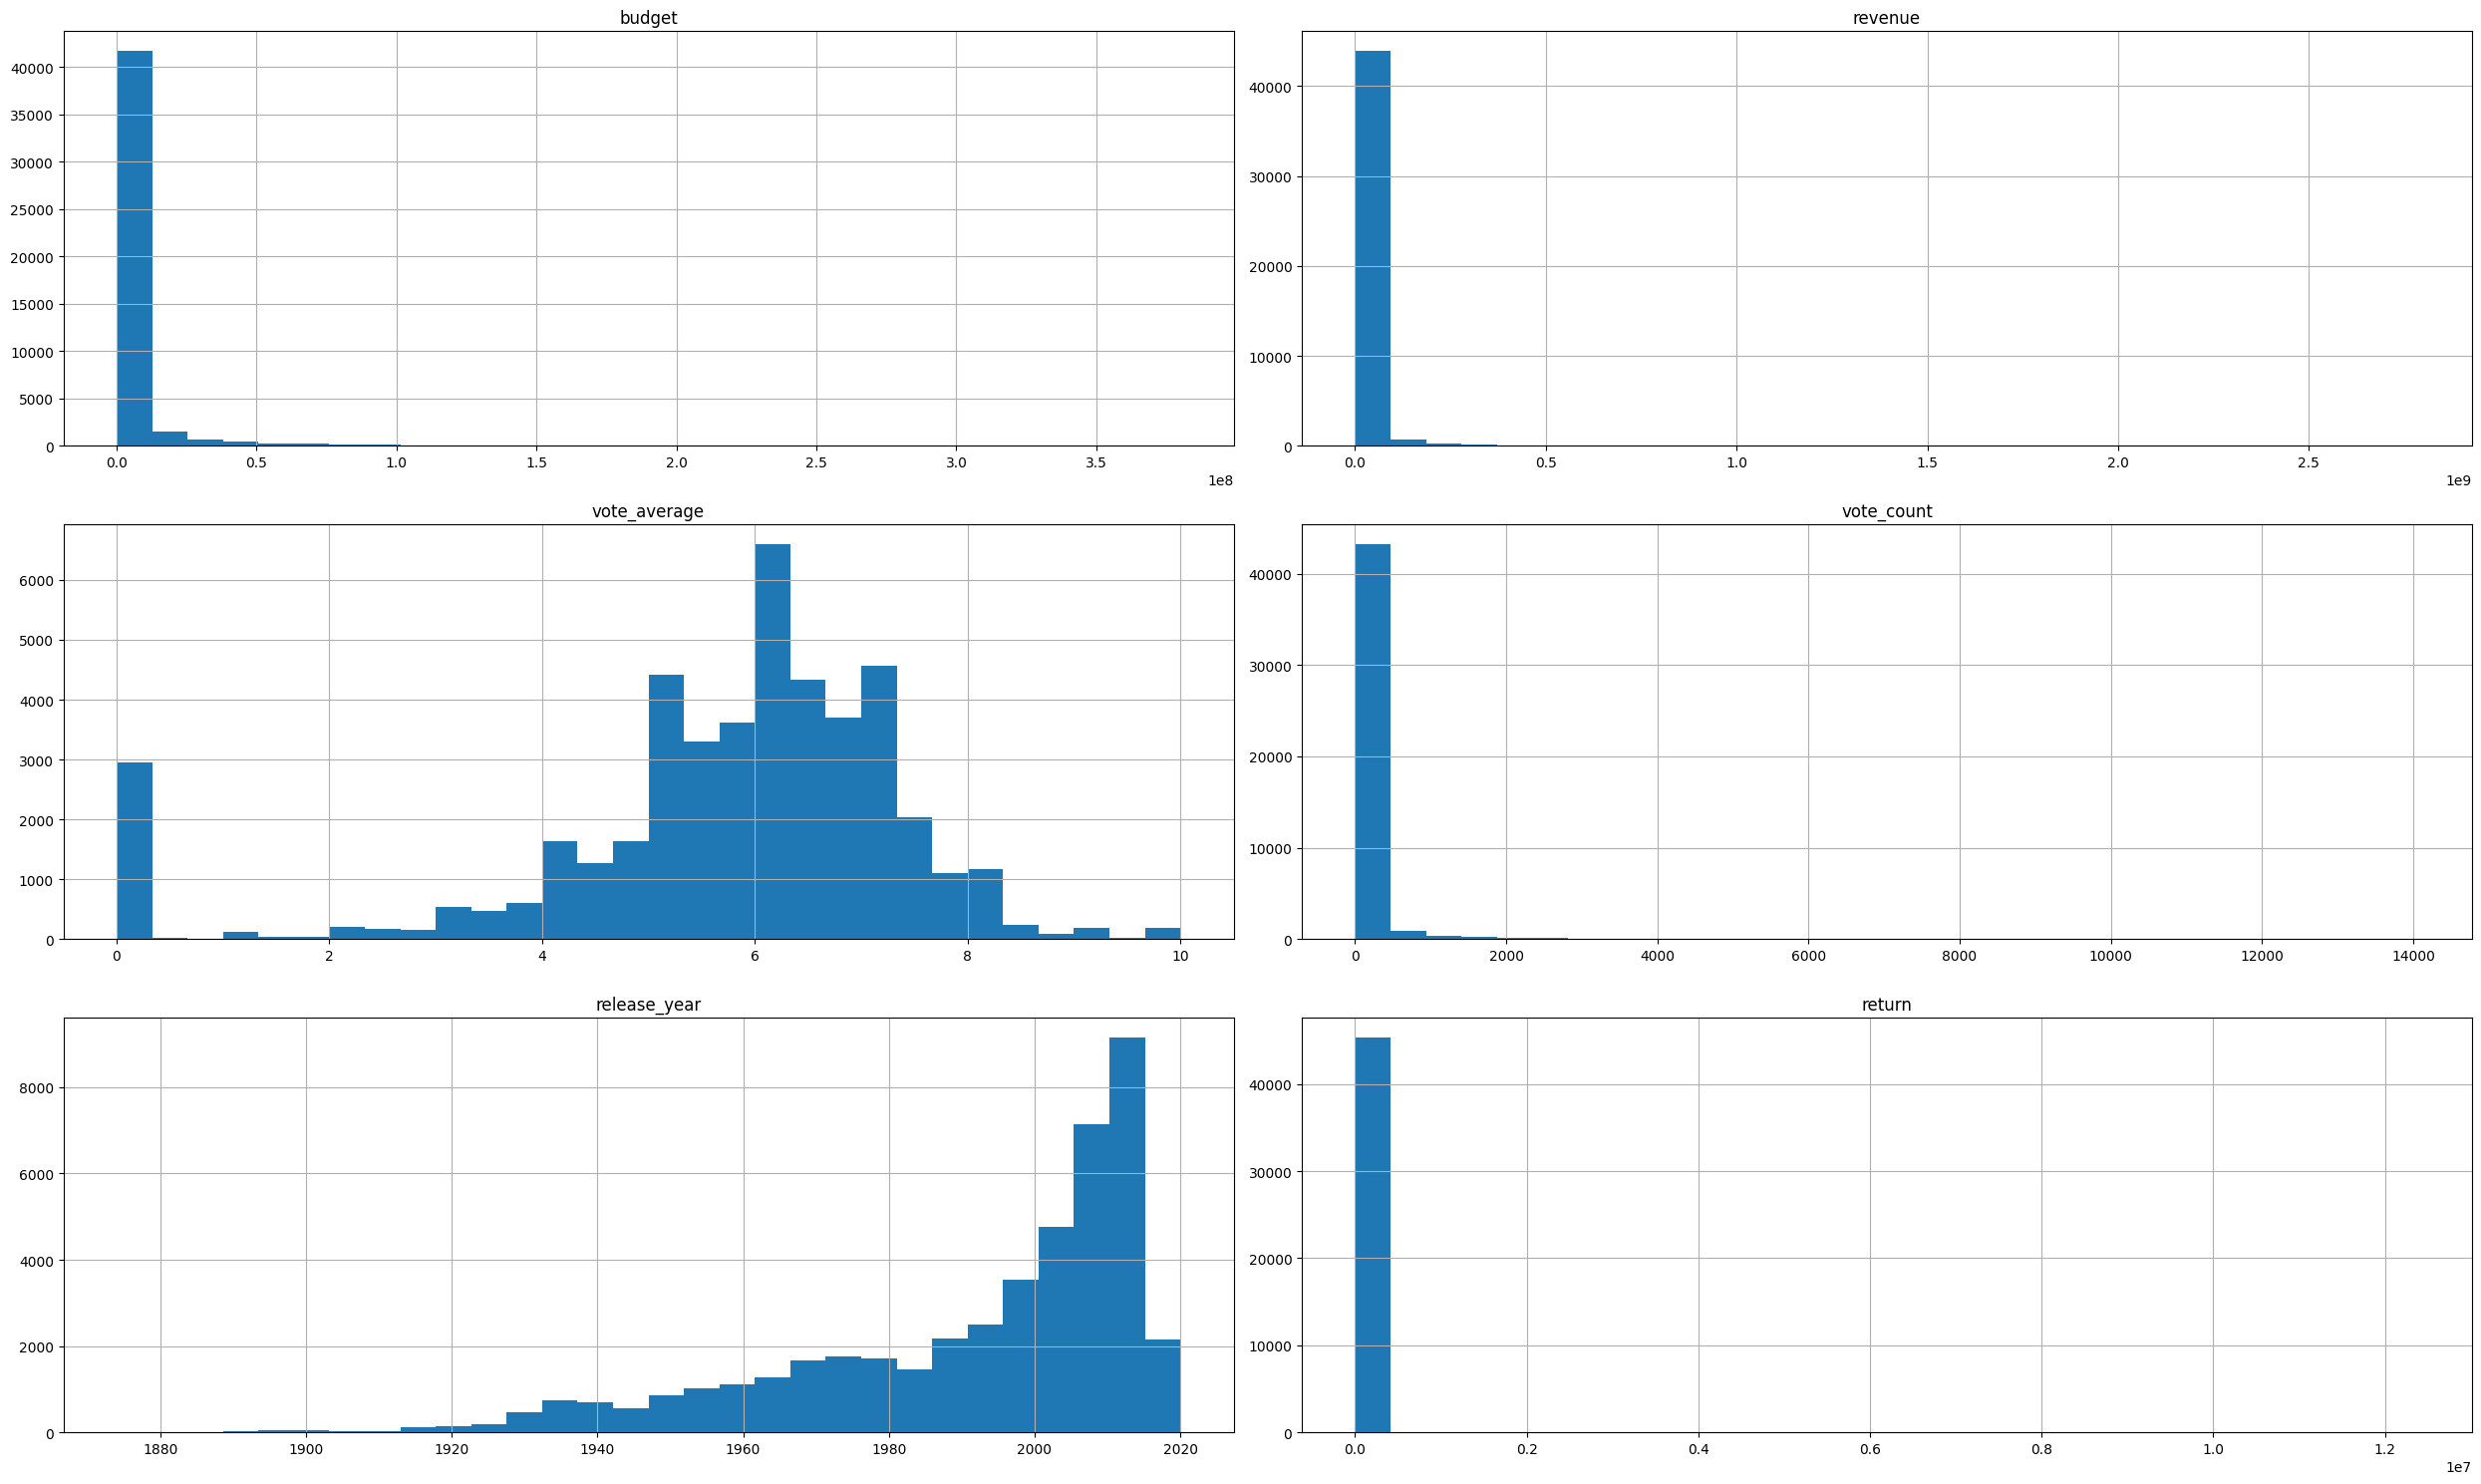

In [15]:
# Histograma de las variables numéricas
df_movies.hist(bins=30, figsize=(25,15))
plt.tight_layout()
plt.show()

Alguna conclusiones: 

1. *Budget:* esta grafica del presupuesto no es muy explicativa, creo que vale la pena explorarla mejor de otra manera. 
2. *Revenue:* esta grafica del presupuesto no es muy explicativa, creo que vale la pena explorarla mejor de otra manera. 
3. *vote_average*: lo que veo en esta grafica es que el promedio de votos de la mayoria de las peliculas esta entre 5 y 7.5 
4. *vote_count*: no considero que esta variable sea muy representativa, creo que puedo descartarla o explorarla de otra manera. 
5. *release_year*: veo que la mayoria de peliculas fueron estrenadas desde la decada de 1990. Voy a revisar si elimino las anteriores para que la información pueda ser más ilustrativa. 
6. *Return*: esta grafica del presupuesto no es muy explicativa, creo que vale la pena explorarla mejor de otra manera. 

In [9]:
# Procedo a eliminar todas las peliculas que tienen fecha de estreno inferior a 1990.

df_movies1990 = df_movies[df_movies['release_year'] >= 1990]

Voy a tratar de explorar nuevamente la información que tengo.

In [13]:
df_movies1990.info() #Para  mirar los datos nulos y el tipo de los datos que me quedaron. 

<class 'pandas.core.frame.DataFrame'>
Index: 29675 entries, 0 to 45365
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          29675 non-null  float64
 1   id              29675 non-null  object 
 2   original_title  29675 non-null  object 
 3   popularity      29675 non-null  object 
 4   release_date    29675 non-null  object 
 5   revenue         29675 non-null  float64
 6   title           29675 non-null  object 
 7   vote_average    29675 non-null  float64
 8   vote_count      29675 non-null  float64
 9   Collection      3006 non-null   object 
 10  genres          28151 non-null  object 
 11  ProdCompany_1   20624 non-null  object 
 12  ProdCompany_2   12439 non-null  object 
 13  ProdCompany_3   7557 non-null   object 
 14  Character Name  26607 non-null  object 
 15  Lead actor      27867 non-null  object 
 16  Director        28946 non-null  object 
 17  release_year    29675 non-null  int6

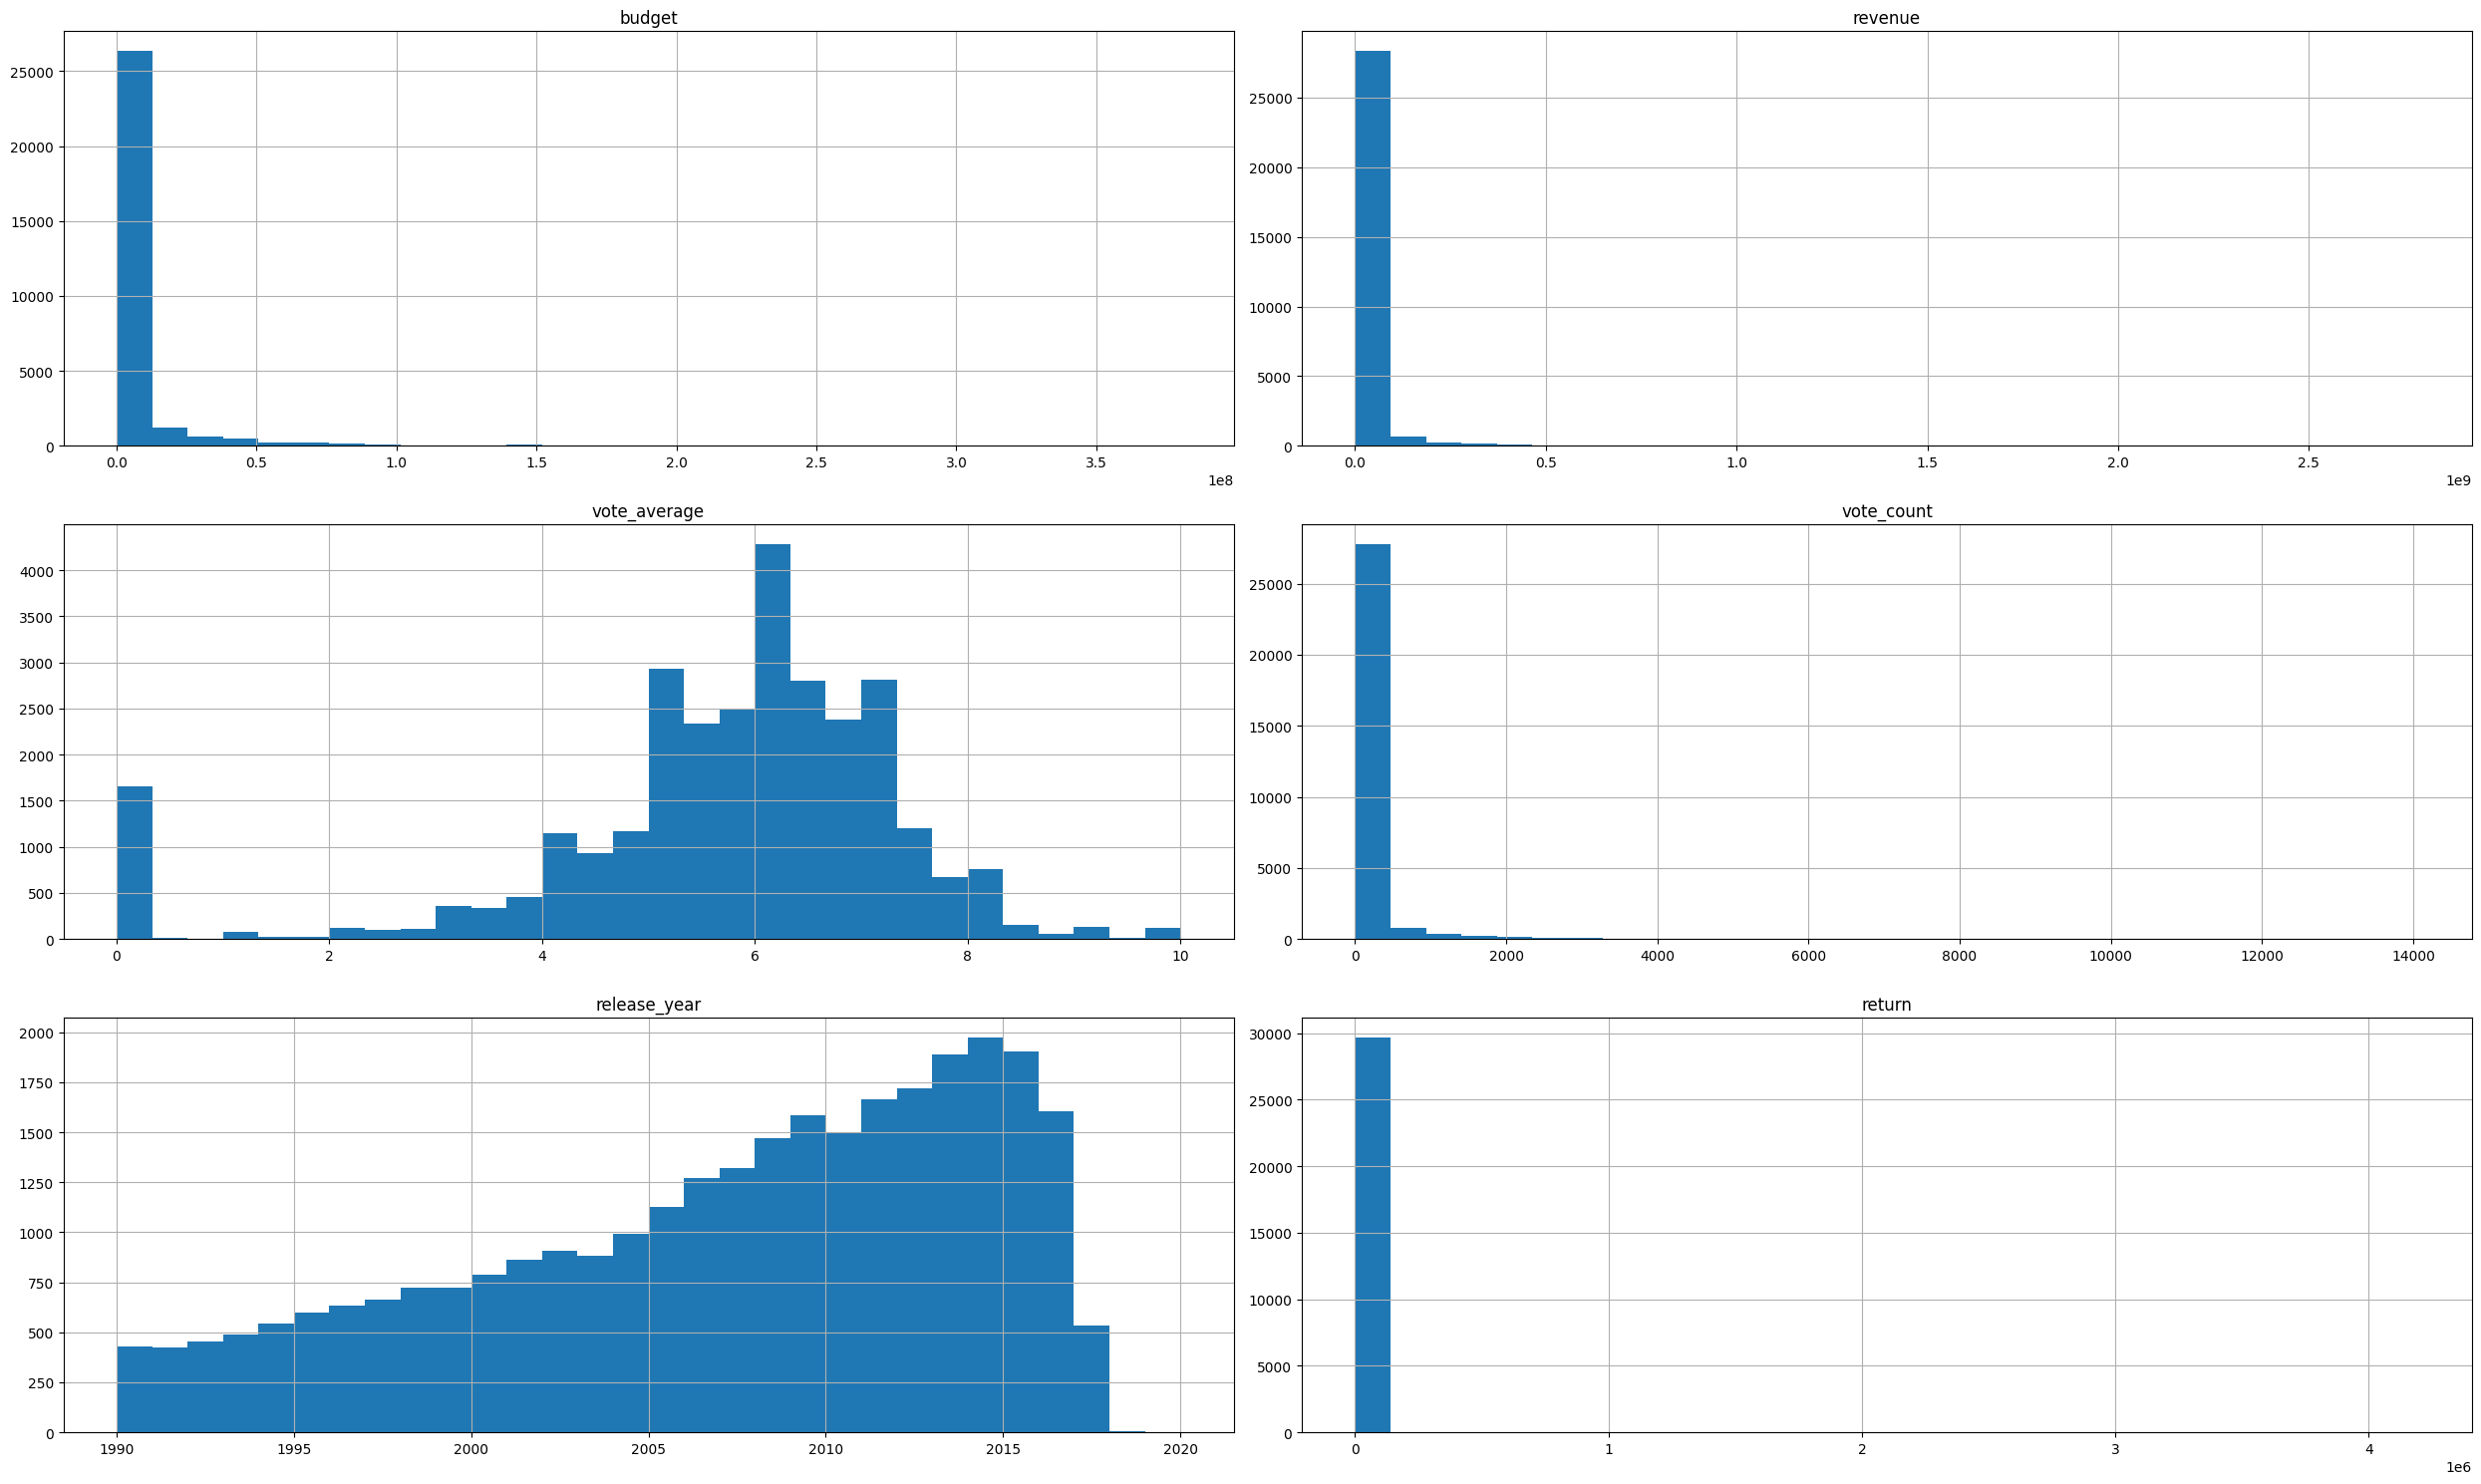

In [16]:
# Vuelvo a generar los histogramas de las variables numéricas, con las peliculas desde 1990
df_movies1990.hist(bins=30, figsize=(25,15))
plt.tight_layout()
plt.show()

Veo que la información inicialmente arrojada por las variables no tiene cambios muy representativos, continuo buscando otra manera de entender la información. 

BUSQUEDA DE OUTLIERS

Voy a buscar valores atipicos en mis variables: budget, revenue y return

In [24]:
df_movies1990[['id','budget', 'revenue', 'return']].head()

,id,budget,revenue,return
0,862,30000000.0,373554033.0,12.451801
1,8844,65000000.0,262797249.0,4.043035
2,15602,0.0,0.0,0.000000
3,31357,16000000.0,81452156.0,5.090760
4,11862,0.0,76578911.0,0.000000


In [19]:
df_movies1990[['budget', 'revenue', 'return']].describe()

,budget,revenue,return
count,2.967500e+04,2.967500e+04,2.967500e+04
mean,6.079766e+06,1.541432e+07,2.703405e+02
std,2.114934e+07,7.749041e+07,2.972024e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09,4.197477e+06


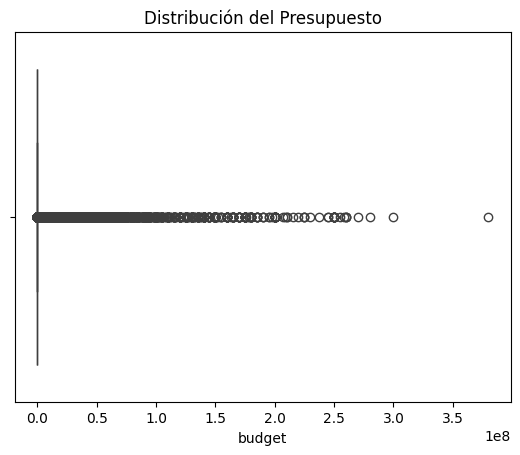

In [25]:
sns.boxplot(x=df_movies1990['budget'])
plt.title('Distribución del Presupuesto')
plt.show()

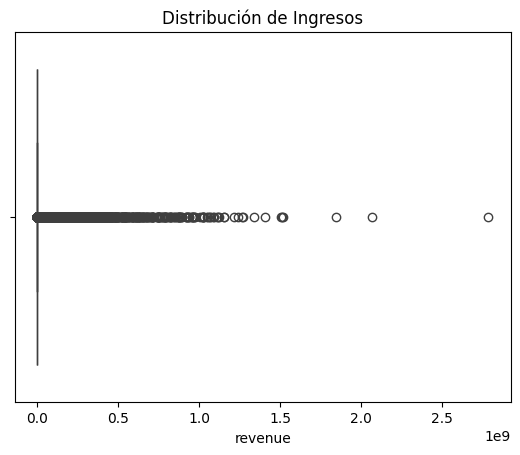

In [26]:
sns.boxplot(x=df_movies1990['revenue'])
plt.title('Distribución de Ingresos')
plt.show()

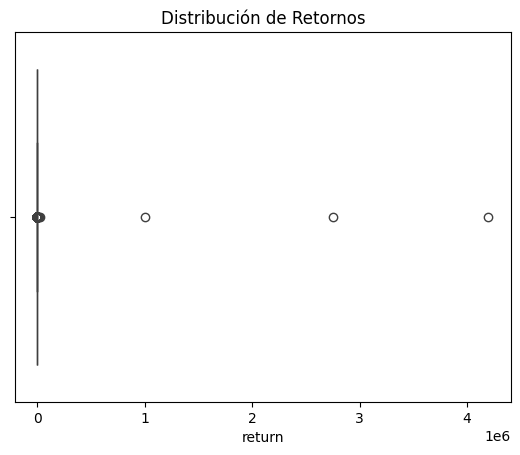

In [27]:
sns.boxplot(x=df_movies1990['return'])
plt.title('Distribución de Retornos')
plt.show()

Las anteriores graficas me muestran que efectivamente hay valores atipicos dentro de mi rango de tiempo. 

A continuación voy a generar graficas de estas tres variables pero agrupadas por año: de cada variable voy a generar una grafica del total y una del promedio.

1. Exploración de peliculas por presupuesto.

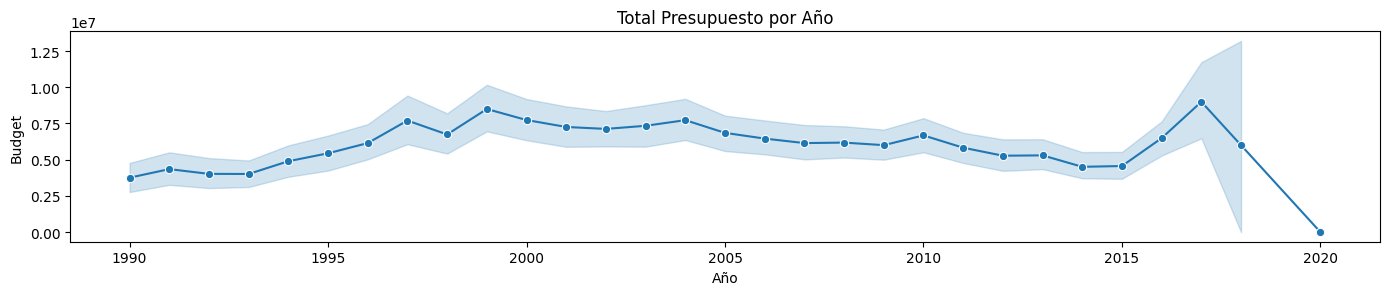

In [32]:
# Crear la figura y los ejes para las gráficas
plt.figure(figsize=(14, 8))

# Graficar el presupuesto (budget) por año
plt.subplot(3, 1, 1)  # 3 filas, 1 columna, posición 1
sns.lineplot(data=df_movies1990, x='release_year', y='budget', marker='o')
plt.title('Total Presupuesto por Año')
plt.xlabel('Año')
plt.ylabel('Budget')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

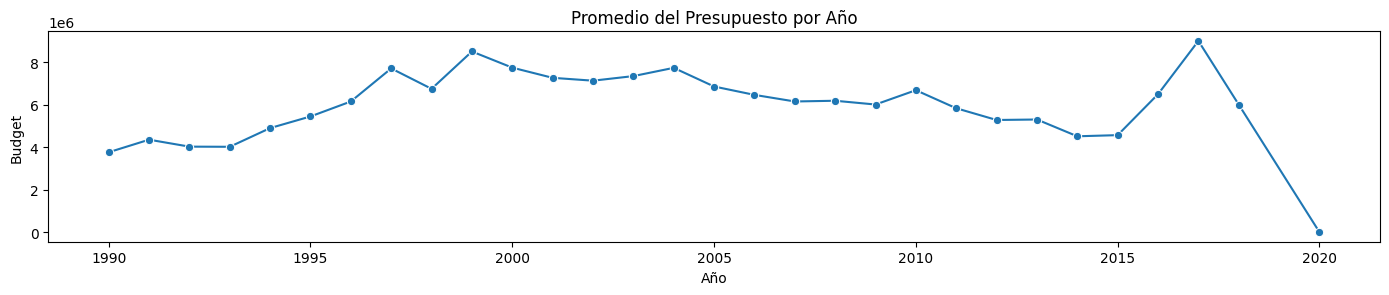

In [35]:
# Crear la figura y los ejes para las gráficas
plt.figure(figsize=(14, 8))

# Agrupar por año y calcular la media del presupuesto
df_budget_avg = df_movies1990.groupby('release_year')['budget'].mean().reset_index()

# Graficar el presupuesto promedio (budget) por año
plt.subplot(3, 1, 1)  # 3 filas, 1 columna, posición 1
sns.lineplot(data=df_budget_avg, x='release_year', y='budget', marker='o')
plt.title('Promedio del Presupuesto por Año')
plt.xlabel('Año')
plt.ylabel('Budget')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [44]:
# Quiero ver un top 5 de los años en los que, en promedio, se hizo una mayor inversión en peliculas. 

df_budget_avg = df_movies1990.groupby('release_year').agg({
    'budget': 'mean'
}).reset_index()
df_budget_avg['budget'] = df_budget_avg['budget'].round().astype(int)
df_budget_avg = df_budget_avg.sort_values(by='budget', ascending=False)

df_budget_avg.head()

,release_year,budget
27,2017,8997289
9,1999,8499623
10,2000,7739614
14,2004,7730384
7,1997,7702900


In [46]:
df_highest_budget = df_movies1990[['original_title', 'release_year', 'budget']].sort_values(by='budget', ascending=False)
df_highest_budget.head(5)


,original_title,release_year,budget
17110,Pirates of the Caribbean: On Stranger Tides,2011,380000000.0
11819,Pirates of the Caribbean: At World's End,2007,300000000.0
26519,Avengers: Age of Ultron,2015,280000000.0
11059,Superman Returns,2006,270000000.0
16119,Tangled,2010,260000000.0


2. Exploración de peliculas por ingresos.

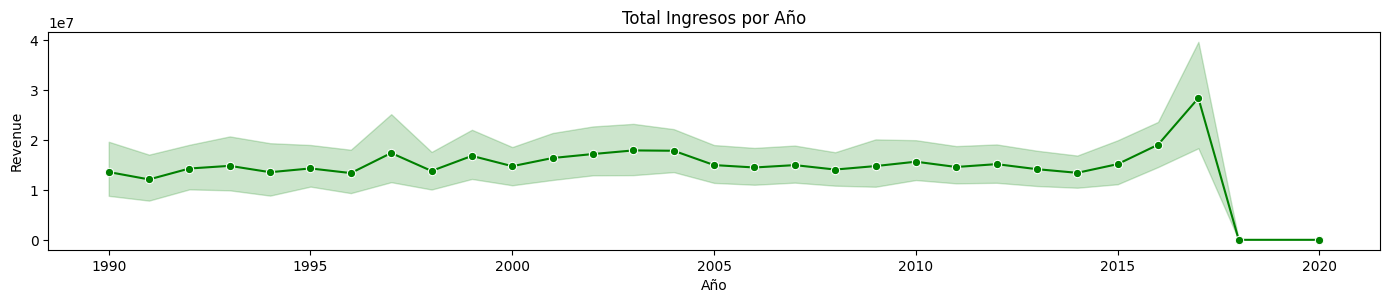

In [33]:
# Crear la figura y los ejes para las gráficas
plt.figure(figsize=(14, 8))

# Graficar los ingresos (revenue) por año
plt.subplot(3, 1, 2)  # 3 filas, 1 columna, posición 2
sns.lineplot(data=df_movies1990, x='release_year', y='revenue', marker='o', color='green')
plt.title('Total Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Revenue')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

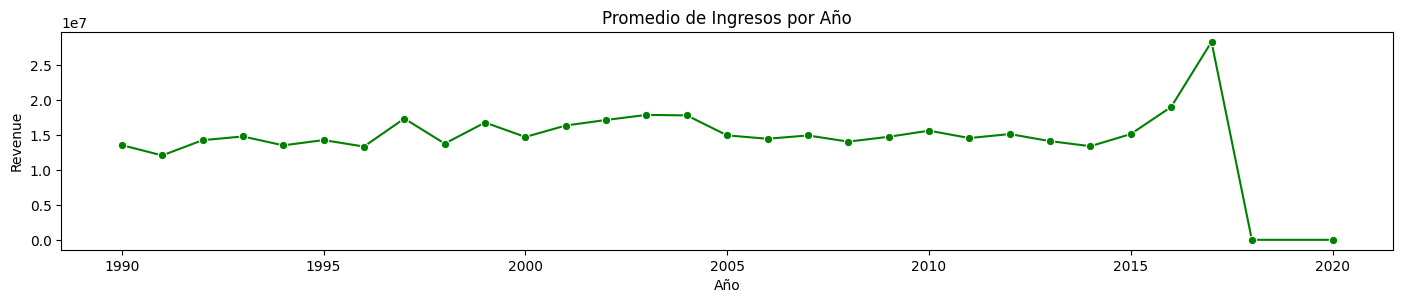

In [36]:
# Crear la figura y los ejes para las gráficas
plt.figure(figsize=(14, 8))

# Agrupar por año y calcular la media de los ingresos
df_revenue_avg = df_movies1990.groupby('release_year')['revenue'].mean().reset_index()

# Graficar los ingresos promedio (revenue) por año
plt.subplot(3, 1, 2)  # 3 filas, 1 columna, posición 2
sns.lineplot(data=df_revenue_avg, x='release_year', y='revenue', marker='o', color='green')
plt.title('Promedio de Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Revenue')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [47]:
df_revenue_avg = df_movies1990.groupby('release_year').agg({
    'revenue': 'mean'
}).reset_index()
df_revenue_avg['revenue'] = df_revenue_avg['revenue'].round().astype(int)
df_revenue_avg = df_revenue_avg.sort_values(by='revenue', ascending=False)
df_revenue_avg.head()


,release_year,revenue
27,2017,28338148
26,2016,19013639
13,2003,17876560
14,2004,17808603
7,1997,17359758


In [51]:
df_highest_revenue = df_movies1990[['original_title', 'release_year', 'revenue']]
df_highest_revenue['revenue'] = df_highest_revenue['revenue'].round().astype(int)
df_highest_revenue = df_highest_revenue.sort_values(by='revenue', ascending=False)
df_highest_revenue.head(5)


C:\Users\anavi\AppData\Local\Temp\ipykernel_27584\118968648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highest_revenue['revenue'] = df_highest_revenue['revenue'].round().astype(int)


,original_title,release_year,revenue
14541,Avatar,2009,2787965087
26516,Star Wars: The Force Awakens,2015,2068223624
1636,Titanic,1997,1845034188
17802,The Avengers,2012,1519557910
25045,Jurassic World,2015,1513528810


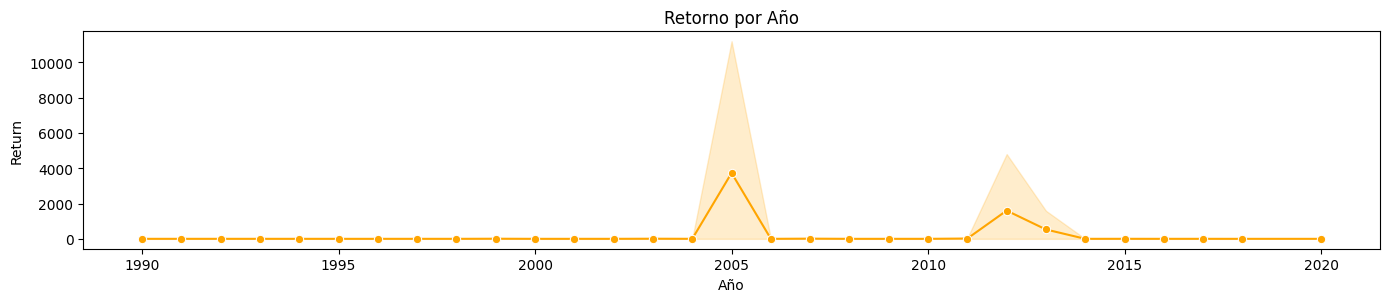

In [34]:
# Crear la figura y los ejes para las gráficas
plt.figure(figsize=(14, 8))

# Graficar el retorno (return) por año
plt.subplot(3, 1, 3)  # 3 filas, 1 columna, posición 3
sns.lineplot(data=df_movies1990, x='release_year', y='return', marker='o', color='orange')
plt.title('Retorno por Año')
plt.xlabel('Año')
plt.ylabel('Return')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

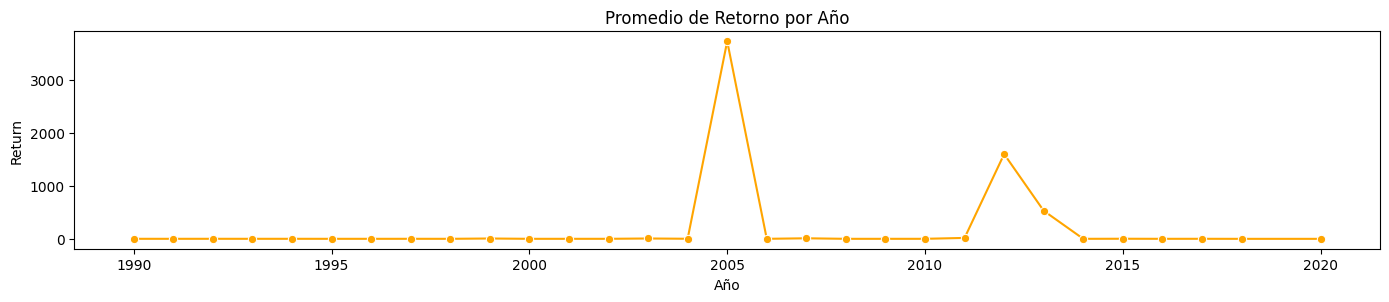

In [37]:
# Crear la figura y los ejes para las gráficas
plt.figure(figsize=(14, 8))

# Agrupar por año y calcular la media del retorno
df_return_avg = df_movies1990.groupby('release_year')['return'].mean().reset_index()

# Graficar el retorno promedio (return) por año
plt.subplot(3, 1, 3)  # 3 filas, 1 columna, posición 3
sns.lineplot(data=df_return_avg, x='release_year', y='return', marker='o', color='orange')
plt.title('Promedio de Retorno por Año')
plt.xlabel('Año')
plt.ylabel('Return')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [48]:
df_return_avg = df_movies1990.groupby('release_year').agg({
    'return': 'mean'
}).reset_index()
df_return_avg['return'] = df_return_avg['return'].round().astype(int)
df_return_avg = df_return_avg.sort_values(by='return', ascending=False)
df_return_avg.head()

,release_year,return
15,2005,3732
22,2012,1601
23,2013,530
21,2011,17
17,2007,10


In [55]:
df_highest_return = df_movies1990[['original_title', 'release_year', 'return']]
df_highest_return['return'] = df_highest_return['return'].apply(lambda x: round(x, 2))
df_highest_return = df_highest_return.sort_values(by='return', ascending=False)
df_highest_return.head(10)

C:\Users\anavi\AppData\Local\Temp\ipykernel_27584\4070436904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highest_return['return'] = df_highest_return['return'].apply(lambda x: round(x, 2))


,original_title,release_year,return
14362,웰컴 투 동막골,2005,4197476.62
22245,Aquí Entre Nos,2012,2755584.00
25950,Nurse 3-D,2013,1000000.00
16653,From Prada to Nada,2011,26881.72
14182,Paranormal Activity,2007,12890.39
8205,Tarnation,2003,5330.34
2592,The Blair Witch Project,1999,4133.33
41393,대호,2015,2216.69
19239,"Love, Wedding, Marriage",2011,1378.00
7782,Super Size Me,2004,439.62


In [53]:
df_highest_return.tail(5)

,original_title,release_year,return
58,Le confessionnal,1995,0.0
5545,고양이를 부탁해,2001,0.0
45225,Ki – nie polubisz jej,2011,0.0
45226,Zmruz oczy,2003,0.0
45365,Queerama,2017,0.0


In [54]:
df_highest_return.describe()

,release_year,return
count,29675.000000,2.967500e+04
mean,2006.715181,2.703406e+02
std,7.194626,2.972024e+04
min,1990.000000,0.000000e+00
25%,2002.000000,0.000000e+00
50%,2008.000000,0.000000e+00
75%,2013.000000,0.000000e+00
max,2020.000000,4.197477e+06


CONCLUSIÓN: He visto que en mi dataset original hay muchas peliculas de las decadas anteriores a 1990 que no son muy representativas por lo tanto las elimino, tambien despues de todo este analisis exploratorio veo que si hay valores atipicos que vale la pena exploar por eso no los voy a borrar.

Me parece muy importante tener en cuenta que así como no hay mucha correlación entre si una pelicula tuvo un gran presupuesto porque veo que esto no implica que haya tenido tambien un gran ingreso, me voy a centrar en la columna de retorno de la inversión como variable representativa y voy a crear un nuevo df de movies solo con las peliculas desde 1990 (este ya está) y luego de este voy a eliminar todas las peliculas con un return igual o menor que cero, considerando que no fueron peliculas rentables. 

In [57]:
df_moviesE = df_movies1990[df_movies1990['return'] > 0]
df_moviesE.head(5)

,budget,id,original_title,popularity,release_date,revenue,title,vote_average,vote_count,Collection,genres,ProdCompany_1,ProdCompany_2,ProdCompany_3,Character Name,Lead actor,Director,release_year,return
0,30000000.0,862,Toy Story,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",Pixar Animation Studios,NaN,NaN,Woody (voice),Tom Hanks,John Lasseter,1995,12.451801
1,65000000.0,8844,Jumanji,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,NaN,"['Adventure', 'Fantasy', 'Family']",TriStar Pictures,Teitler Film,Interscope Communications,Alan Parrish,Robin Williams,Joe Johnston,1995,4.043035
3,16000000.0,31357,Waiting to Exhale,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,NaN,"['Comedy', 'Drama', 'Romance']",Twentieth Century Fox Film Corporation,NaN,NaN,Savannah 'Vannah' Jackson,Whitney Houston,Forest Whitaker,1995,5.090760
5,60000000.0,949,Heat,17.924927,1995-12-15,187436818.0,Heat,7.7,1886.0,NaN,"['Action', 'Crime', 'Drama', 'Thriller']",Regency Enterprises,Forward Pass,Warner Bros.,Lt. Vincent Hanna,Al Pacino,Michael Mann,1995,3.123947
8,35000000.0,9091,Sudden Death,5.23158,1995-12-22,64350171.0,Sudden Death,5.5,174.0,NaN,"['Action', 'Adventure', 'Thriller']",Universal Pictures,Imperial Entertainment,Signature Entertainment,Darren Francis Thomas McCord,Jean-Claude Van Damme,Peter Hyams,1995,1.838576


In [59]:
df_moviesE.describe()

,budget,revenue,vote_average,vote_count,release_year,return
count,4.362000e+03,4.362000e+03,4362.000000,4362.000000,4362.000000,4.362000e+03
mean,3.618073e+07,1.012847e+08,6.204470,813.557313,2005.919532,1.839146e+03
std,4.272923e+07,1.788148e+08,0.900923,1333.969339,7.191372,7.750737e+04
min,1.000000e+00,1.000000e+00,0.000000,0.000000,1990.000000,5.217391e-07
25%,8.000000e+06,7.692510e+06,5.700000,91.000000,2001.000000,7.027650e-01
50%,2.100000e+07,3.548533e+07,6.200000,322.000000,2007.000000,1.854288e+00
75%,5.000000e+07,1.156488e+08,6.800000,911.000000,2012.000000,3.664547e+00
max,3.800000e+08,2.787965e+09,9.100000,14075.000000,2017.000000,4.197477e+06


In [60]:
df_moviesE.to_csv('Exitosas_1990.csv', index=False)